In [39]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [40]:
# Reading the csv file
csv_file_path = 'fau_airlines_performance.csv'
df = pd.read_csv(csv_file_path)

Exploratory Data Analysis (EDA) 

In [41]:
df

,EmpNumber,Age,Gender,MaritalStatus,EmpJobRole,DistanceFromHomeKm,EmpJobSatisfaction,EmpEnvironmentSatisfaction,EmpRelationshipSatisfaction,EmpJobInvolvement,EmpJobExperience,EmpHourlyRate -> change according to the age & experience,OverTime,EmpLastSalaryHikePercent,EmpWorkLifeBalance,YearsSinceLastPromotion,Attrition,PerformanceRating
0,E0000001,22,Female,Single,Flight Attendant,10,2,4,2,3,1,18,Yes,11,2,5,Yes,2
1,E0000002,29,Female,Single,Flight Attendant,14,2,4,2,3,2,21,Yes,8,3,2,No,3
2,E0000003,29,Female,Married,Flight Attendant,5,2,4,5,2,2,21,Yes,5,3,4,No,2
3,E0000004,45,Male,Divorced,Check-in agent,10,2,2,1,2,8,28,No,5,2,2,Yes,3
4,E0000005,54,Male,Single,Flight Attendant,16,2,1,4,3,9,32,No,12,3,4,No,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
627,E0000628,54,Female,Married,Flight Attendant,2,2,2,2,4,12,32,No,11,3,4,No,2
628,E0000629,30,Female,Divorced,Flight Attendant,3,2,4,3,4,13,21,Yes,3,3,1,No,2
629,E0000630,25,Female,Single,Flight Attendant,10,2,4,5,4,12,18,Yes,3,3,4,No,2
630,E0000631,55,Male,Married,Flight Attendant,28,2,4,1,4,11,32,No,12,3,3,No,2


In [42]:
df.columns

Index(['EmpNumber', 'Age', 'Gender', 'MaritalStatus', 'EmpJobRole',
       'DistanceFromHomeKm', 'EmpJobSatisfaction',
       'EmpEnvironmentSatisfaction', 'EmpRelationshipSatisfaction',
       'EmpJobInvolvement', 'EmpJobExperience',
       'EmpHourlyRate -> change according to the age & experience', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpWorkLifeBalance',
       'YearsSinceLastPromotion', 'Attrition', 'PerformanceRating'],
      dtype='object')

In [43]:
df.head()

,EmpNumber,Age,Gender,MaritalStatus,EmpJobRole,DistanceFromHomeKm,EmpJobSatisfaction,EmpEnvironmentSatisfaction,EmpRelationshipSatisfaction,EmpJobInvolvement,EmpJobExperience,EmpHourlyRate -> change according to the age & experience,OverTime,EmpLastSalaryHikePercent,EmpWorkLifeBalance,YearsSinceLastPromotion,Attrition,PerformanceRating
0,E0000001,22,Female,Single,Flight Attendant,10,2,4,2,3,1,18,Yes,11,2,5,Yes,2
1,E0000002,29,Female,Single,Flight Attendant,14,2,4,2,3,2,21,Yes,8,3,2,No,3
2,E0000003,29,Female,Married,Flight Attendant,5,2,4,5,2,2,21,Yes,5,3,4,No,2
3,E0000004,45,Male,Divorced,Check-in agent,10,2,2,1,2,8,28,No,5,2,2,Yes,3
4,E0000005,54,Male,Single,Flight Attendant,16,2,1,4,3,9,32,No,12,3,4,No,3


In [44]:
df.describe()

,Age,DistanceFromHomeKm,EmpJobSatisfaction,EmpEnvironmentSatisfaction,EmpRelationshipSatisfaction,EmpJobInvolvement,EmpJobExperience,EmpHourlyRate -> change according to the age & experience,EmpLastSalaryHikePercent,EmpWorkLifeBalance,YearsSinceLastPromotion,PerformanceRating
count,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000
mean,39.115506,9.594937,2.330696,2.748418,2.927215,2.723101,11.262658,25.443038,7.387658,2.764241,3.000000,2.585443
std,10.023472,8.368334,0.811842,1.095299,1.402201,0.710508,3.834202,4.332450,2.871805,0.711989,1.401833,0.783533
min,21.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,18.000000,3.000000,1.000000,1.000000,2.000000
25%,31.000000,2.000000,2.000000,2.000000,2.000000,2.000000,9.000000,23.000000,5.000000,2.000000,2.000000,2.000000
50%,40.000000,7.000000,2.000000,3.000000,3.000000,3.000000,12.000000,25.000000,7.000000,3.000000,3.000000,2.000000
75%,48.000000,15.000000,2.000000,4.000000,4.000000,3.000000,13.000000,28.000000,10.000000,3.000000,4.000000,3.000000
max,55.000000,29.000000,5.000000,4.000000,5.000000,4.000000,20.000000,32.000000,12.000000,4.000000,5.000000,5.000000


The mean performance of each job role:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


         EmpJobRole  PerformanceRating
0    Check-in agent           2.674740
1  Flight Attendant           2.510204


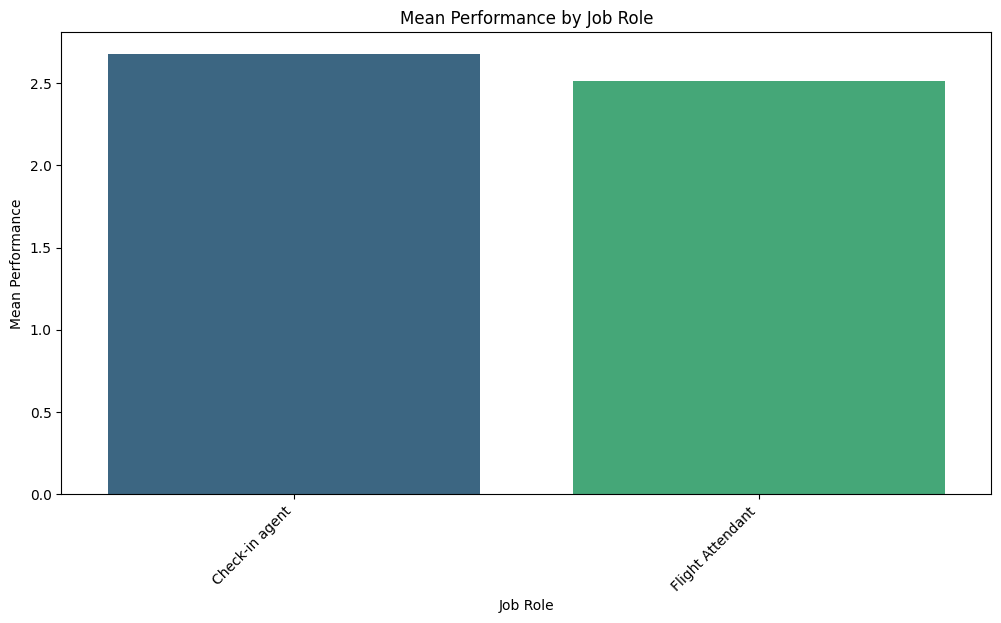

In [45]:
# print in a column chart form the mean performance of each job role.

import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the mean performance for each job role
mean_performance_by_job_role = df.groupby('EmpJobRole')['PerformanceRating'].mean().reset_index()
print(mean_performance_by_job_role)
# Plotting the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='EmpJobRole', y='PerformanceRating', data=mean_performance_by_job_role, palette='viridis', hue='EmpJobRole')

# Add labels and title
plt.title('Mean Performance by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Mean Performance')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Remove the legend for a cleaner look
plt.legend().remove()

# Show the plot
plt.show()


In [46]:
# check for any missing values, 
df.isnull().values.any()

False

In [47]:
df

,EmpNumber,Age,Gender,MaritalStatus,EmpJobRole,DistanceFromHomeKm,EmpJobSatisfaction,EmpEnvironmentSatisfaction,EmpRelationshipSatisfaction,EmpJobInvolvement,EmpJobExperience,EmpHourlyRate -> change according to the age & experience,OverTime,EmpLastSalaryHikePercent,EmpWorkLifeBalance,YearsSinceLastPromotion,Attrition,PerformanceRating
0,E0000001,22,Female,Single,Flight Attendant,10,2,4,2,3,1,18,Yes,11,2,5,Yes,2
1,E0000002,29,Female,Single,Flight Attendant,14,2,4,2,3,2,21,Yes,8,3,2,No,3
2,E0000003,29,Female,Married,Flight Attendant,5,2,4,5,2,2,21,Yes,5,3,4,No,2
3,E0000004,45,Male,Divorced,Check-in agent,10,2,2,1,2,8,28,No,5,2,2,Yes,3
4,E0000005,54,Male,Single,Flight Attendant,16,2,1,4,3,9,32,No,12,3,4,No,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
627,E0000628,54,Female,Married,Flight Attendant,2,2,2,2,4,12,32,No,11,3,4,No,2
628,E0000629,30,Female,Divorced,Flight Attendant,3,2,4,3,4,13,21,Yes,3,3,1,No,2
629,E0000630,25,Female,Single,Flight Attendant,10,2,4,5,4,12,18,Yes,3,3,4,No,2
630,E0000631,55,Male,Married,Flight Attendant,28,2,4,1,4,11,32,No,12,3,3,No,2


Converting categorical attributes to numerical data types:

In [48]:
# Define mapping dictionaries for categorical columns
gender_mapping = {'Female': 0, 'Male': 1}
marital_status_mapping = {'Single': 0, 'Divorced': 1, 'Married': 2}
job_role_mapping = {'Flight Attendant': 0, 'Check-in agent': 1}
yes_no_mapping = {'Yes': 1, 'No': 0}

# Apply the mappings to the corresponding columns
df['Gender'] = df['Gender'].map(gender_mapping)
df['MaritalStatus'] = df['MaritalStatus'].map(marital_status_mapping)
df['EmpJobRole'] = df['EmpJobRole'].map(job_role_mapping)
df['OverTime'] = df['OverTime'].map(yes_no_mapping)
df['Attrition'] = df['Attrition'].map(yes_no_mapping)


In [49]:

df

,EmpNumber,Age,Gender,MaritalStatus,EmpJobRole,DistanceFromHomeKm,EmpJobSatisfaction,EmpEnvironmentSatisfaction,EmpRelationshipSatisfaction,EmpJobInvolvement,EmpJobExperience,EmpHourlyRate -> change according to the age & experience,OverTime,EmpLastSalaryHikePercent,EmpWorkLifeBalance,YearsSinceLastPromotion,Attrition,PerformanceRating
0,E0000001,22,0,0,0,10,2,4,2,3,1,18,1,11,2,5,1,2
1,E0000002,29,0,0,0,14,2,4,2,3,2,21,1,8,3,2,0,3
2,E0000003,29,0,2,0,5,2,4,5,2,2,21,1,5,3,4,0,2
3,E0000004,45,1,1,1,10,2,2,1,2,8,28,0,5,2,2,1,3
4,E0000005,54,1,0,0,16,2,1,4,3,9,32,0,12,3,4,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
627,E0000628,54,0,2,0,2,2,2,2,4,12,32,0,11,3,4,0,2
628,E0000629,30,0,1,0,3,2,4,3,4,13,21,1,3,3,1,0,2
629,E0000630,25,0,0,0,10,2,4,5,4,12,18,1,3,3,4,0,2
630,E0000631,55,1,2,0,28,2,4,1,4,11,32,0,12,3,3,0,2


Correlation Matrix:

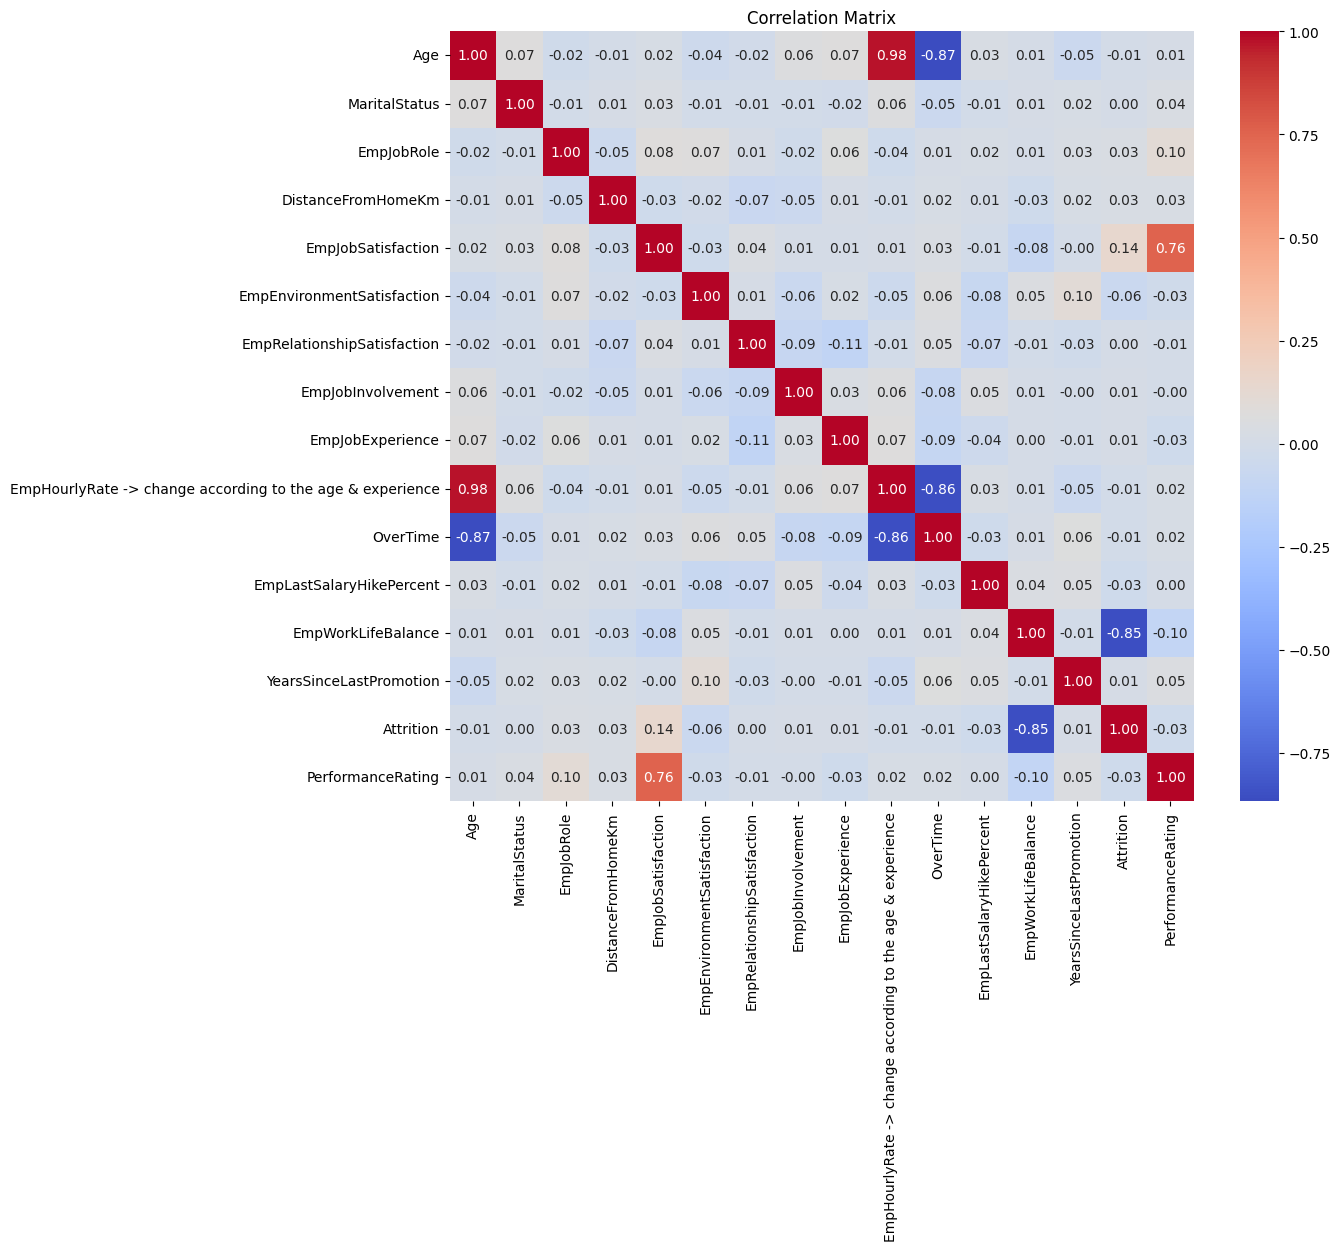


Correlation with PerformanceRating: 
 PerformanceRating                                            1.000000
EmpJobSatisfaction                                           0.758983
EmpJobRole                                                   0.104695
YearsSinceLastPromotion                                      0.050499
MaritalStatus                                                0.035090
DistanceFromHomeKm                                           0.028490
OverTime                                                     0.021496
EmpHourlyRate -> change according to the age & experience    0.020110
Age                                                          0.009335
EmpLastSalaryHikePercent                                     0.003920
EmpJobInvolvement                                           -0.001558
EmpRelationshipSatisfaction                                 -0.005870
EmpEnvironmentSatisfaction                                  -0.025695
Attrition                                          

In [50]:

# Exclude columns from correlation matrix calculations
columns_to_exclude = ['EmpNumber', 'Gender']
correlation_matrix = df.drop(columns=columns_to_exclude).corr()

# Plot a heatmap for the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Print correlations with the 'PerformanceRating' variable
performance_correlation = correlation_matrix['PerformanceRating'].sort_values(ascending=False)
print("\nCorrelation with PerformanceRating: \n", performance_correlation)

Continuous of the EDA:

In [51]:
# Group by Environment Satisfaction and calculate the average Performance Rating
env_satisfaction_performance = df.groupby('EmpEnvironmentSatisfaction')['PerformanceRating'].mean().reset_index()

# Group by Relationship Satisfaction and calculate the average Performance Rating
relationship_satisfaction_performance = df.groupby('EmpRelationshipSatisfaction')['PerformanceRating'].mean().reset_index()

# Group by Job Satisfaction and calculate the average Performance Rating
job_satisfaction_performance = df.groupby('EmpJobSatisfaction')['PerformanceRating'].mean().reset_index()

# Display the results in tabular format without indexes
print("■ Performance Rating (vs.) Environment Satisfaction:")
print(env_satisfaction_performance.to_string(index=False))

print("\n■ Performance Rating (vs.) Relationship Satisfaction:")
print(relationship_satisfaction_performance.to_string(index=False))

print("\n■ Performance Rating (vs.) Job Satisfaction:")
print(job_satisfaction_performance.to_string(index=False))


■ Performance Rating (vs.) Environment Satisfaction:
 EmpEnvironmentSatisfaction  PerformanceRating
                          1           2.637931
                          2           2.538462
                          3           2.628415
                          4           2.546798

■ Performance Rating (vs.) Relationship Satisfaction:
 EmpRelationshipSatisfaction  PerformanceRating
                           1           2.602941
                           2           2.504000
                           3           2.659091
                           4           2.629921
                           5           2.517857

■ Performance Rating (vs.) Job Satisfaction:
 EmpJobSatisfaction  PerformanceRating
                  2           2.374291
                  3           2.448276
                  4           3.500000
                  5           5.000000


Machine learning model:

In [52]:
df = df.iloc[:, 1:]

label_encoders = {}
for column in ['Gender', 'MaritalStatus', 'EmpJobRole', 'OverTime', 'Attrition']:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

In [53]:
X = df.drop('PerformanceRating', axis=1)
y = df['PerformanceRating']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
model = SVC(kernel='linear', random_state=42)
model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

SVM Accuracy:

In [56]:
accuracy = model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy:.4f}")

Model Accuracy: 0.7008


Testing Other Classifiers:


In [57]:
classifiers = {
    'SVM': SVC(kernel='linear', random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'MLP': MLPClassifier(random_state=42),
    'SGD': SGDClassifier(loss='log_loss', random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
}

accuracy_scores = {'Classifier': [], 'Accuracy Score': []}

for clf_name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    accuracy = clf.score(X_test, y_test)
    accuracy_scores['Classifier'].append(clf_name)
    accuracy_scores['Accuracy Score'].append(accuracy)

accuracy_df = pd.DataFrame(accuracy_scores)

print(accuracy_df)

      Classifier  Accuracy Score
0            SVM        0.700787
1  Decision Tree        0.637795
2            MLP        0.661417
3            SGD        0.637795
4  Random Forest        0.614173


c:\Users\basse\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
